## Problem Statement: Determining  Wine Quality using Machine Learning


## In this project we will be using Machine Learning to determine the quality of Red Wine with the help of factors like the chemical composition of the vine the contenct of sulpher, alchohol and the quality of the wine.

### Time Line for the Project:
- Importing libraries
- Data Analysis
- Data Preprocessing
- Prediction and Classification using KNN
- Prediction and Classification using Random Forest

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ROCAUC
import warnings;
warnings.filterwarnings('ignore');
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,plot_roc_curve,accuracy_score,r2_score

## Import Data

In [76]:
df = pd.read_csv('QualityPrediction.csv')

In [77]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Check Missing Values

In [78]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Check Mean , Median ,Mode etc

In [80]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## EDA

In [81]:
df.shape

(1599, 12)

In [82]:
sns.set_palette("Set1")
sns.set_style('dark')

<AxesSubplot:xlabel='quality'>

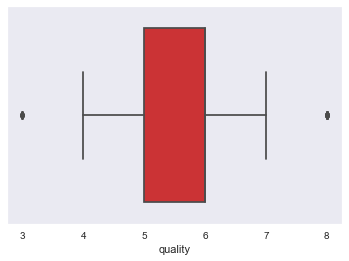

In [83]:
sns.boxplot(df['quality'])

In [84]:
def Outliers(data):
    for feature in data.columns[:-1]:
        d = data[feature]
        iqr = d.quantile(0.75) - d.quantile(0.25)
        Min = d.quantile(0.25) - 1.5*iqr
        Max = d.quantile(0.75) + 1.5*iqr 
        outliers = data[(d > Max ) | ( d < Min )]
        p = outliers.groupby(by = 'quality').count().reset_index()
        print('Total outliers for ' + feature + " feature : " + str(outliers[feature].count()))
        
Outliers(df)

Total outliers for fixed acidity feature : 49
Total outliers for volatile acidity feature : 19
Total outliers for citric acid feature : 1
Total outliers for residual sugar feature : 155
Total outliers for chlorides feature : 112
Total outliers for free sulfur dioxide feature : 30
Total outliers for total sulfur dioxide feature : 55
Total outliers for density feature : 45
Total outliers for pH feature : 35
Total outliers for sulphates feature : 59
Total outliers for alcohol feature : 13


<Figure size 864x576 with 0 Axes>

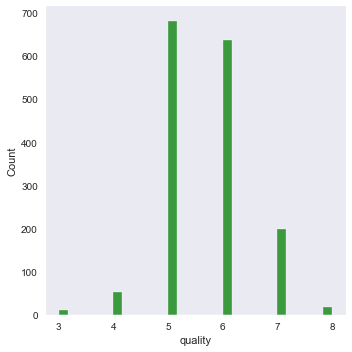

In [85]:
plt.figure(figsize=(12,8))
sns.displot(df['quality'],kde=False,color='green')

<AxesSubplot:>

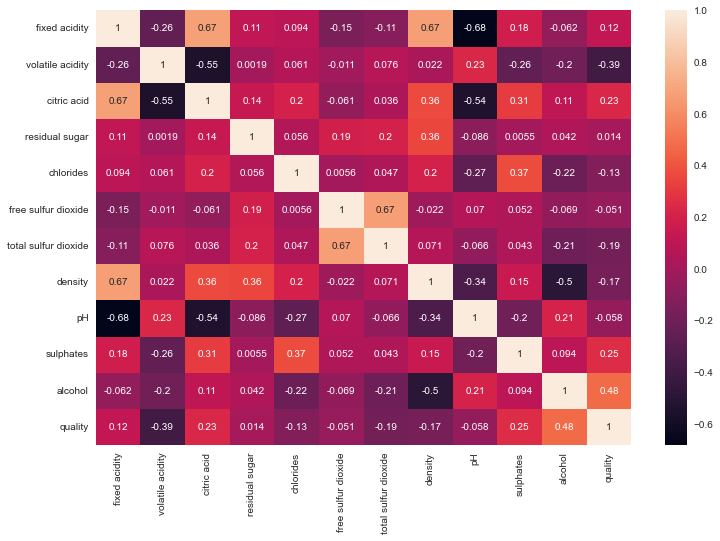

In [86]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

# Alcohol,citric acid ,sulphates and quality has medium positive linear correlation and volatile acidity,chlorides , total sulpher dioxide ,density has negative correlation and There is no correlation between residual sugar and quality.

In [87]:
df_melted = pd.melt(df)

<AxesSubplot:xlabel='variable', ylabel='value'>

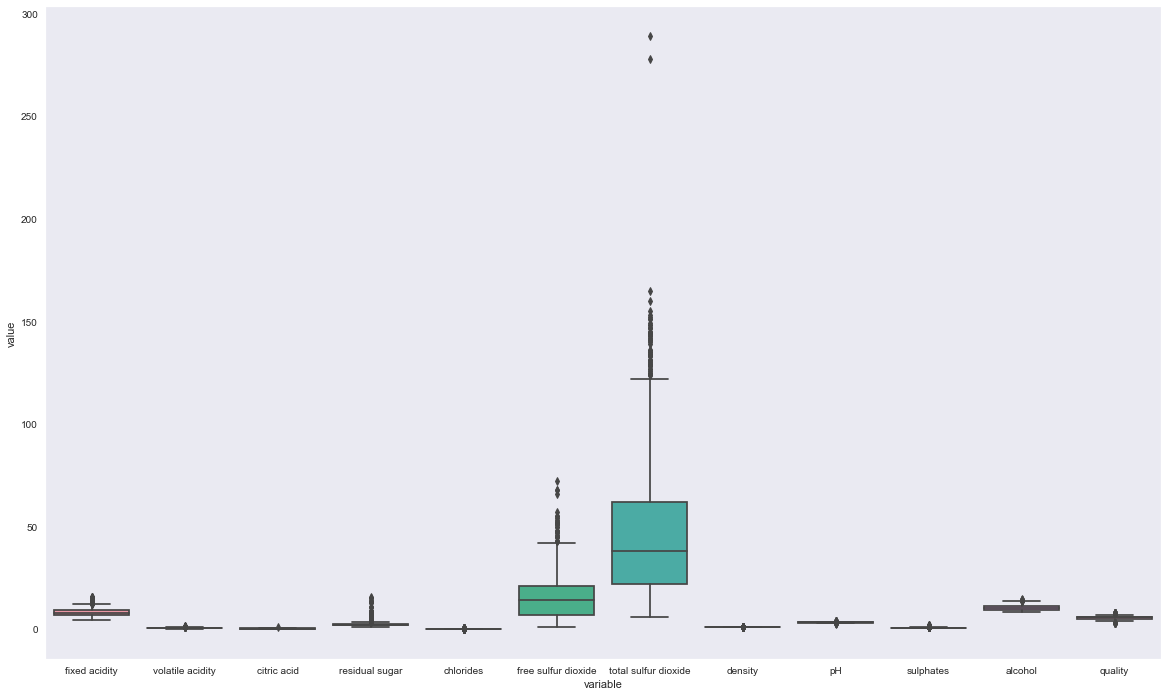

In [88]:
plt.figure(figsize=(20,12))
sns.boxplot(x='variable', y='value', data=df_melted)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

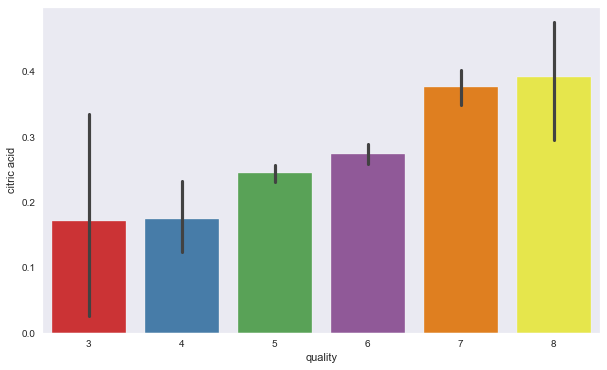

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['quality'],y=df['citric acid'],data=df)

## As the citric acid increases, quality also increases , They both are directly proportional to each other.

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

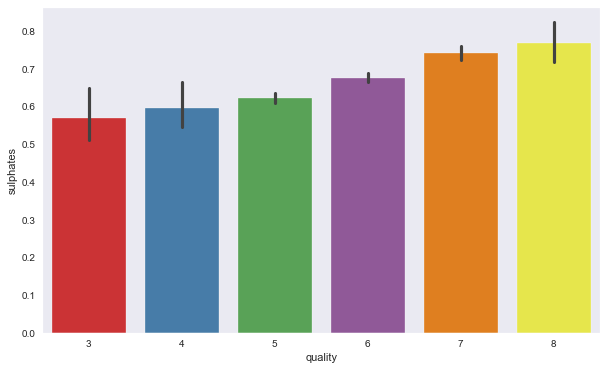

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['quality'],y=df['sulphates'],data=df)

## As the sulphate increases, gradually quality also increases , They both are directly proportional to each other.

<AxesSubplot:xlabel='quality', ylabel='pH'>

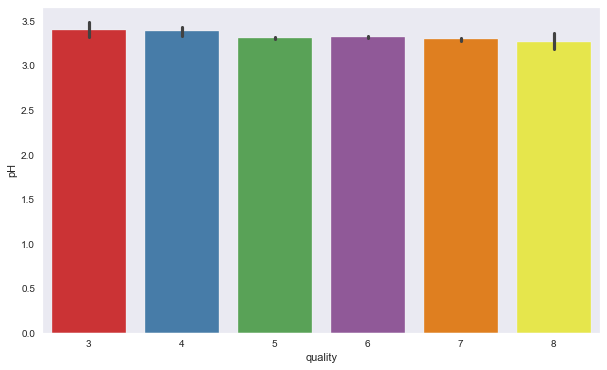

In [91]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['quality'],y=df['pH'],data=df)

# No Conclusion can be drawn from comparison of Ph and Quality

<AxesSubplot:xlabel='quality', ylabel='count'>

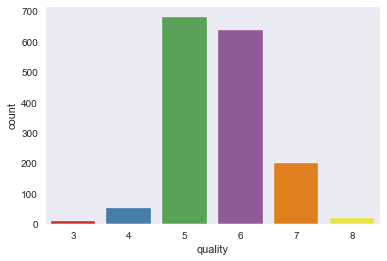

In [92]:
sns.countplot(x=df['quality'],data=df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

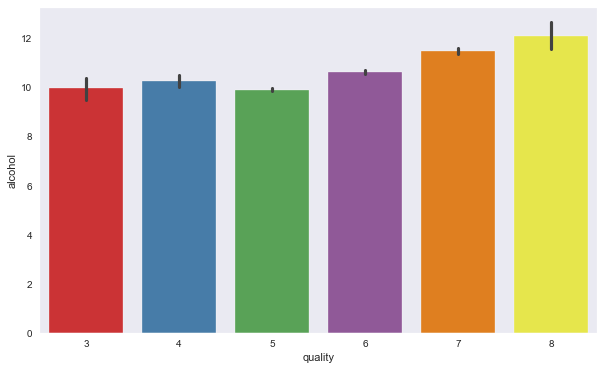

In [93]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['quality'],y=df['alcohol'],data=df)

## As the alcohol increases , quality also increases .They is strong correlation between alcohol and quality.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

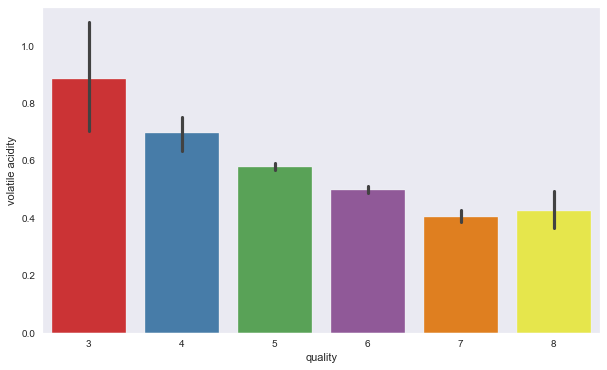

In [94]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['quality'],y=df['volatile acidity'],data=df)

## Observation

### As the Volatile acidity increases , quality decreases.

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

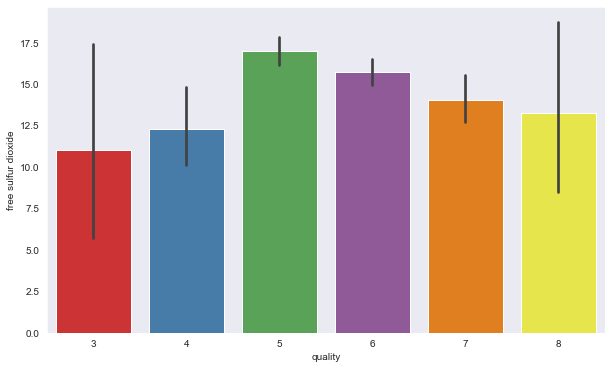

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['quality'],y=df['free sulfur dioxide'],data=df)

# No Conclusion can be drawn from comparison of free sulphur dioxide and Quality

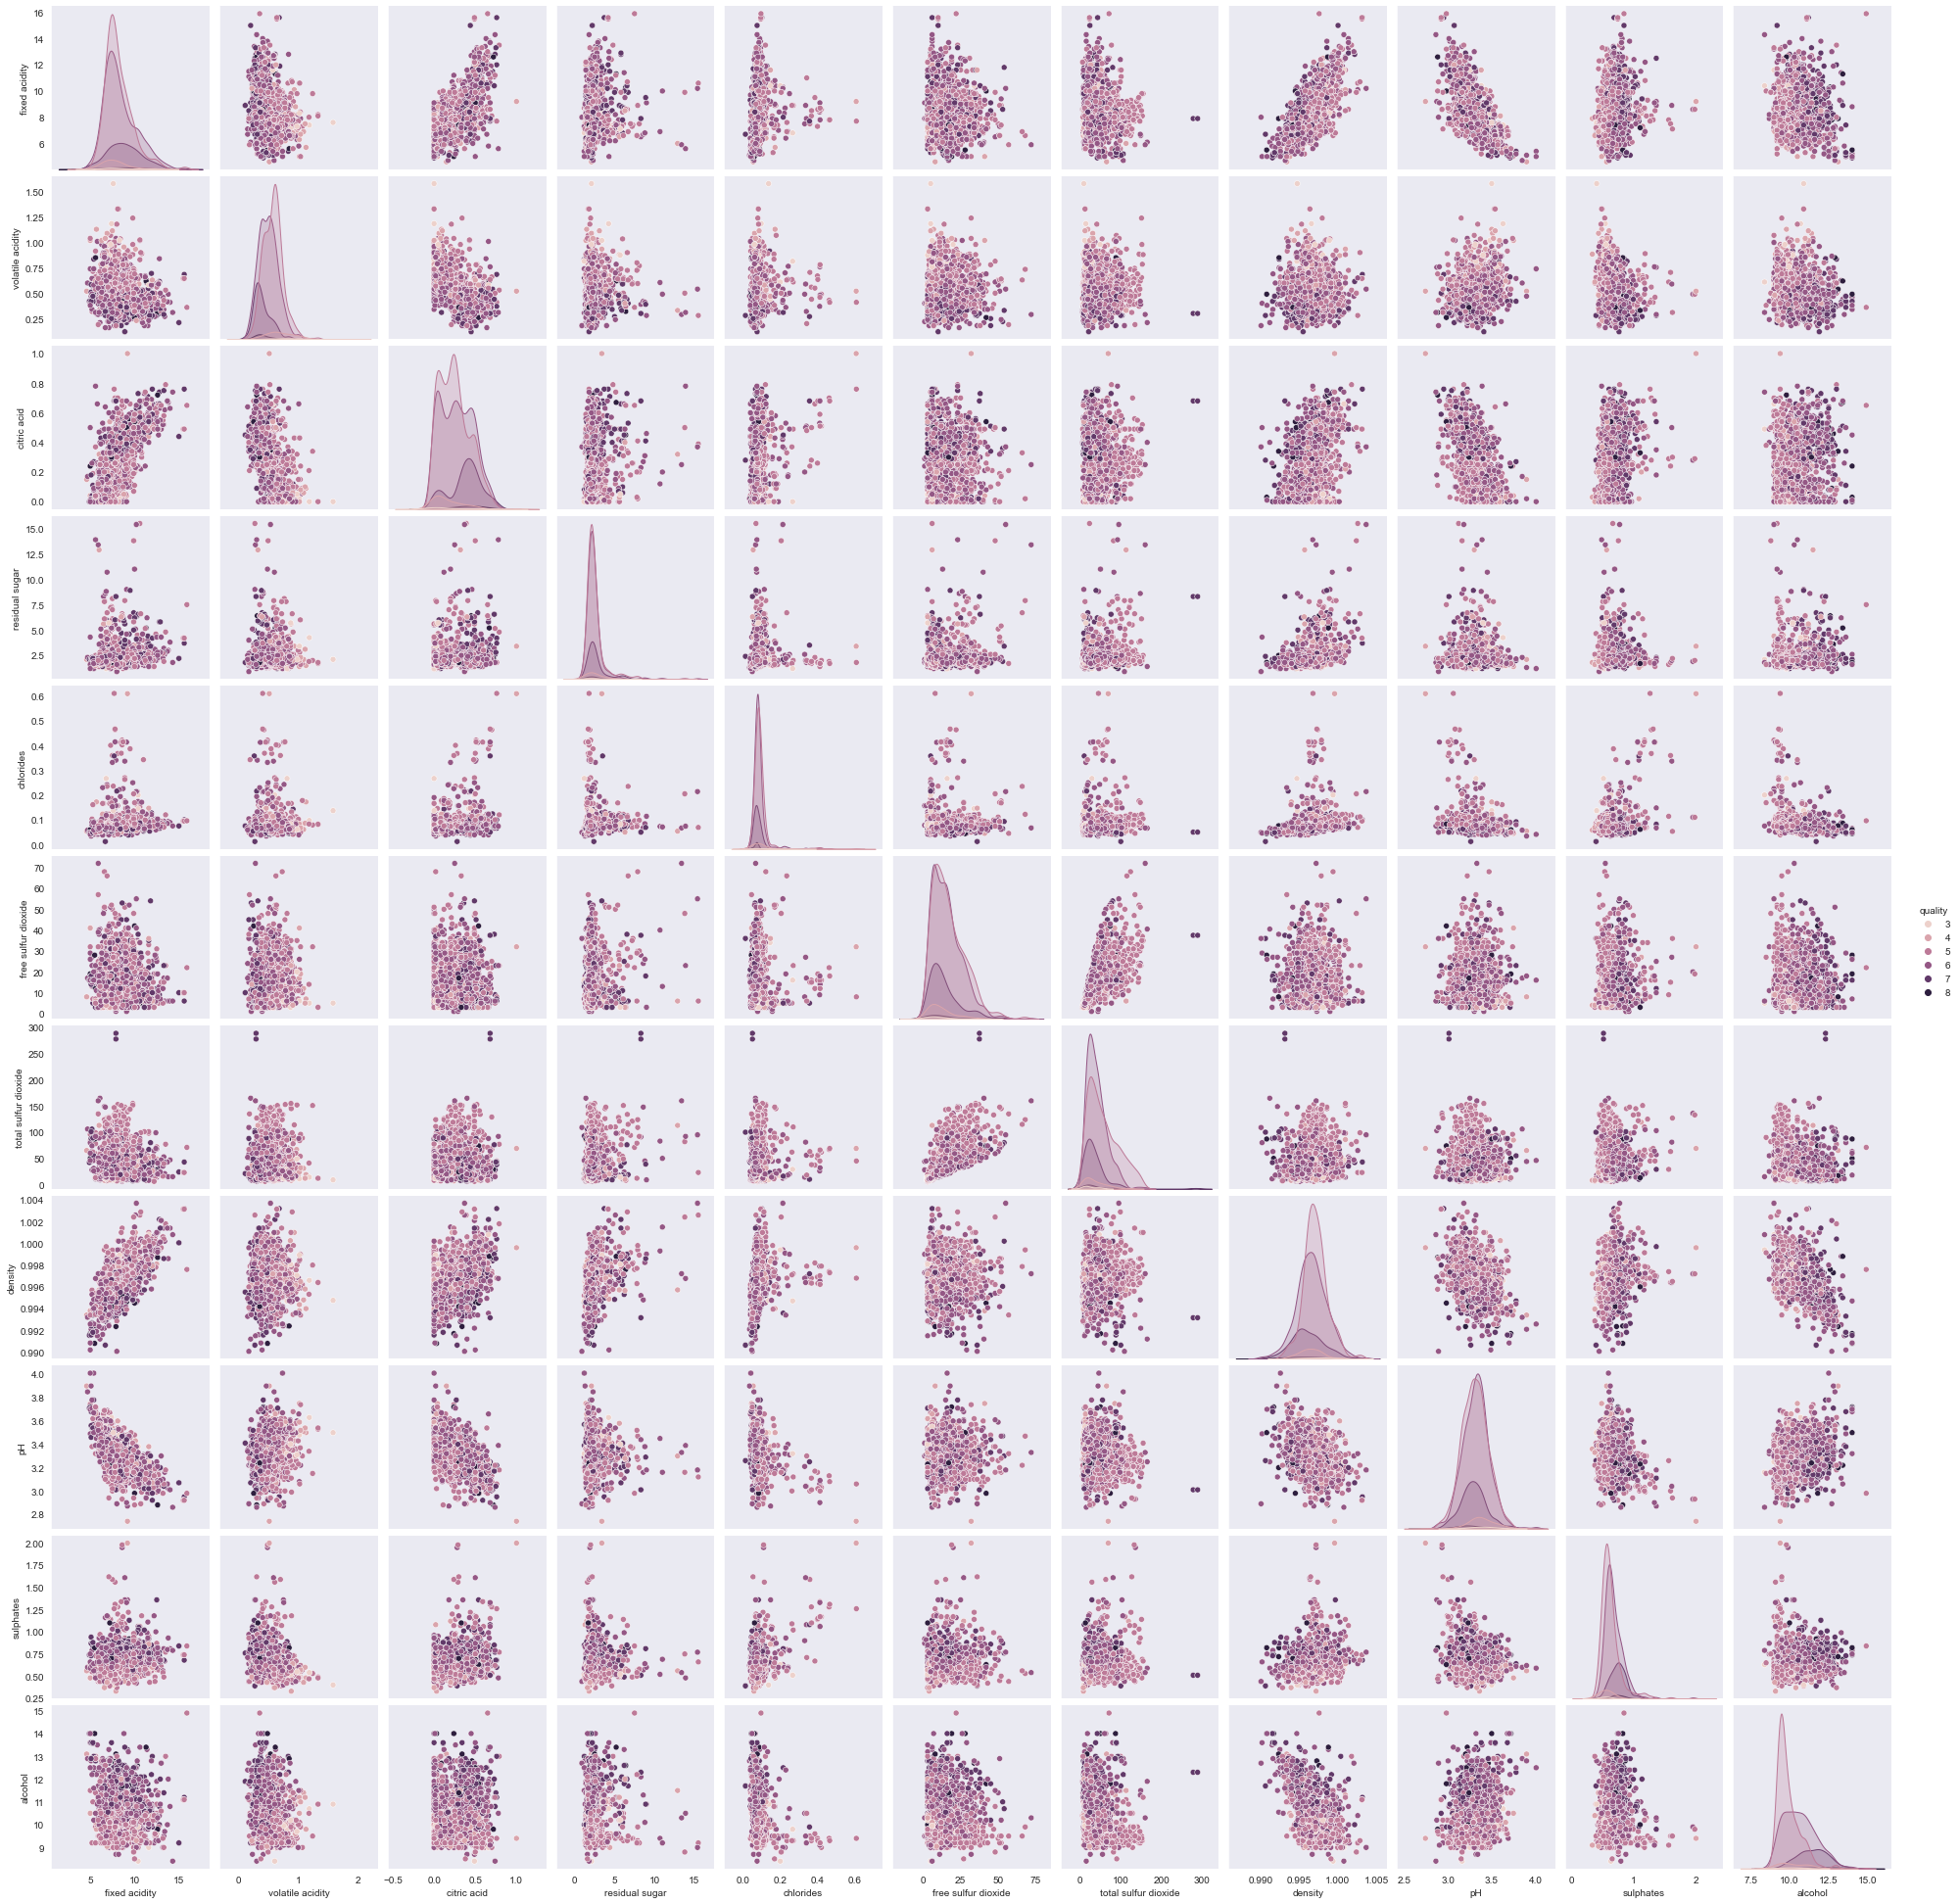

In [23]:
sns.pairplot(df,hue='quality')

##  So For classification, There are ML Models like
1. Logistic Regression
2. KNN
3. Decision Tree
4. Random Forest

## From Pairplot , it can seen that there is too much overlapping between the points , it is diffcult to draw a straight line to divide the points between 1 and 0.
## So there is no point of using Logistic regression so, when there are more overlaps , its better to use KNN or Decision Tree or Random Forest Classifiers.

So we convert quality into 1 as good  and 0 as bad using median value which is 6 before spliting the data.

In [24]:
X = df.drop('quality',axis=1)
y = df['quality'].apply(lambda y_value : 1 if y_value >=7 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)
rf_model = RandomForestClassifier(n_estimators=500,random_state=3)
rf_model.fit(X_train,y_train)
pred1 = rf_model.predict(X_test)
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       283
           1       0.80      0.54      0.65        37

    accuracy                           0.93       320
   macro avg       0.87      0.76      0.80       320
weighted avg       0.93      0.93      0.93       320



In [25]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [26]:
## random forest model works best
print(cross_val_score(rf_model,X,y,cv=10,scoring='accuracy').mean())

0.877437106918239


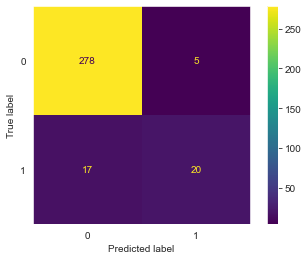

In [27]:
print(plot_confusion_matrix(rf_model,X_test,y_test))

## Lets design a predictor sysem which will take as a input a single row and  predict whether wine is of good quality or not by considering all the features passing as nump array

In [29]:
input_data = (8.1,0.29,0.36,2.2,0.048,35,53,0.995,3.27,1.01,12.4)
#(7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)




# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[1]
Good Quality Wine


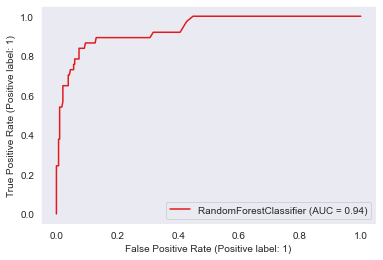

In [30]:
# plot roc curve for random forest
plot_roc_curve(rf_model,X_test,y_test)

In [32]:
# checking OOB score, it seems we have good oob score so very less records are left over
rf_model.score(X_train,y_train)

1.0

## Conclusion 

So We have classified good wine and bad wine and predicted good accuracy using Random Forest ML 

## Using Decision Tree(Binary)

In [8]:
X = df.drop('quality',axis=1)
y = df['quality'].apply(lambda y_value : 1 if y_value >=7 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)
dt_model = DecisionTreeClassifier(max_depth=4,random_state=3)
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       283
           1       0.61      0.59      0.60        37

    accuracy                           0.91       320
   macro avg       0.78      0.77      0.78       320
weighted avg       0.91      0.91      0.91       320



## Logistic Regression With Scaling

In [11]:
X = df.drop('quality',axis=1)
y = df['quality'].apply(lambda y_value : 1 if y_value >=7 else 0)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

In [14]:
scaler=StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [15]:
dt_model = LogisticRegression(random_state=3)
dt_model.fit(scaled_X_train,y_train)
dt_pred = dt_model.predict(scaled_X_test)
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       283
           1       0.71      0.41      0.52        37

    accuracy                           0.91       320
   macro avg       0.82      0.69      0.73       320
weighted avg       0.90      0.91      0.90       320



## USing KNN without Scaling

In [34]:
X = df.drop('quality',axis=1)
y = df['quality'].apply(lambda y_value : 1 if y_value >=7 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
pred1 = knn_model.predict(X_test)
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       417
           1       0.46      0.25      0.33        63

    accuracy                           0.86       480
   macro avg       0.68      0.60      0.62       480
weighted avg       0.84      0.86      0.85       480



## Using KNN with Scaling

In [112]:

X = df.drop('quality',axis=1)
y = df['quality'].apply(lambda y_value : 1 if y_value >=7 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [113]:
error_rate = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,df,df['quality'],cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

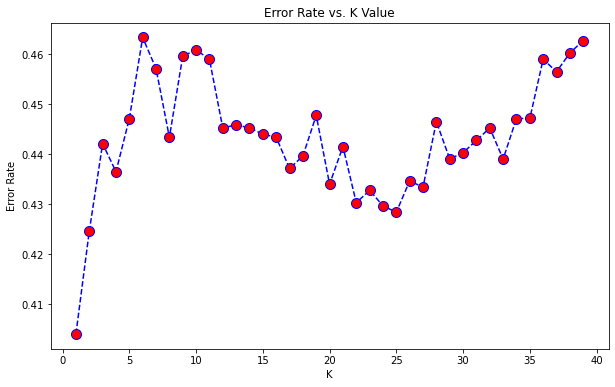

In [114]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# K value is constant in between 10 to 15 , Lets take values 14 and 15

WITH K=14


[[274   9]
 [ 19  18]]


              precision    recall  f1-score   support

           0       0.94      0.97      0.95       283
           1       0.67      0.49      0.56        37

    accuracy                           0.91       320
   macro avg       0.80      0.73      0.76       320
weighted avg       0.90      0.91      0.91       320



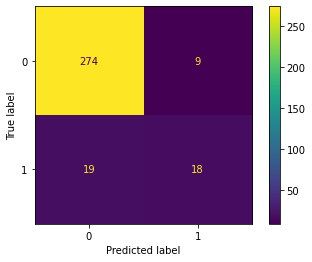

In [117]:
# NOW WITH K=14
knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=14')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(plot_confusion_matrix(knn,scaled_X_test,y_test))

WITH K=15


[[271  12]
 [ 19  18]]


              precision    recall  f1-score   support

           0       0.93      0.96      0.95       283
           1       0.60      0.49      0.54        37

    accuracy                           0.90       320
   macro avg       0.77      0.72      0.74       320
weighted avg       0.90      0.90      0.90       320



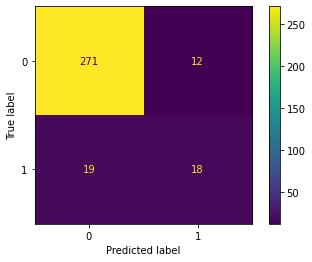

In [118]:
# NOW WITH K=15
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=15')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(plot_confusion_matrix(knn,scaled_X_test,y_test))

## Using Multiclass Scenario

In [63]:
X = df.drop('quality',axis=1)
y = df['quality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)
multiclass_rf = RandomForestClassifier(n_estimators=500,random_state=3,n_jobs=-1)
multiclass_rf.fit(X_train,y_train)
pred1 = multiclass_rf.predict(X_test)
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.77      0.86      0.81       138
           6       0.72      0.78      0.75       131
           7       0.82      0.50      0.62        36
           8       0.00      0.00      0.00         1

    accuracy                           0.74       320
   macro avg       0.38      0.36      0.36       320
weighted avg       0.72      0.74      0.72       320



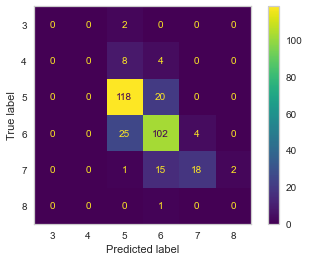

In [64]:
print(plot_confusion_matrix(multiclass_rf,X_test,y_test))
plt.grid(b=None)

In [70]:
# Providing the different values of hyperparameters
param_dist = {'max_depth': [2, 3, 4],
              'n_estimators':[20,100,10],
              'max_features': ['auto', 'sqrt', 'log2', None],
                'bootstrap' : [True, False],
              'criterion': ['gini', 'entropy']}

# Running gridsearchCV to check for all the different PnCs of these parameter values
multi_rf = GridSearchCV(multiclass_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = -1,verbose=2)

#Fitting the train set , so that grid search is executed on this dataset
multi_rf.fit(X_train, y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', multi_rf.best_params_)   #to get best Hyperparameters

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 20}


In [71]:
multiclass_rf.set_params(n_estimators=20,
                    max_features = 'auto', 
                  bootstrap = True, #False
                  max_depth = 4,criterion='gini',random_state=3,n_jobs=-1)

RandomForestClassifier(max_depth=4, max_features='auto', n_estimators=20,
                       n_jobs=-1, random_state=3)

In [72]:
multiclass_rf.fit(X_train,y_train)
multi_cv_pred = multiclass_rf.predict(X_test)
print(classification_report(y_test,multi_cv_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.67      0.80      0.73       138
           6       0.61      0.66      0.64       131
           7       0.86      0.33      0.48        36
           8       0.00      0.00      0.00         1

    accuracy                           0.65       320
   macro avg       0.36      0.30      0.31       320
weighted avg       0.64      0.65      0.63       320



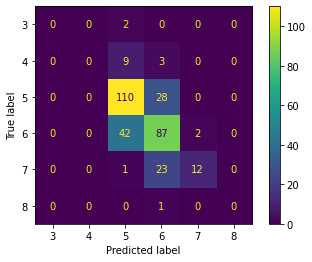

In [29]:
print(plot_confusion_matrix(multiclass_rf,X_test,y_test))

## Accuracy reduced to 65% from 74 using GridSearchCV

## Logistic Regression 

In [17]:
X = df.drop('quality',axis=1)
y = df['quality']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

In [10]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

In [13]:
log_model = LogisticRegression(random_state=3)
log_model.fit(X_train,y_train)
log_pred = log_model.predict(X_test)
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.65      0.75      0.70       138
           6       0.57      0.60      0.58       131
           7       0.65      0.42      0.51        36
           8       0.00      0.00      0.00         1

    accuracy                           0.62       320
   macro avg       0.31      0.29      0.30       320
weighted avg       0.59      0.62      0.60       320



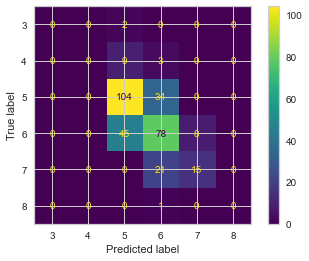

In [12]:
print(plot_confusion_matrix(log_model,X_test,y_test))

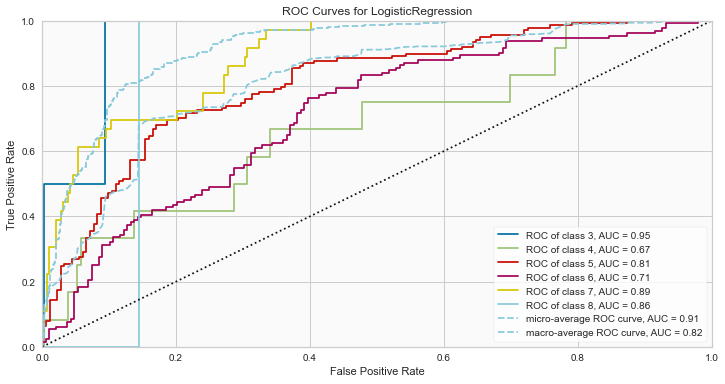

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('#fafafa')
visualizer = ROCAUC(log_model, ax)
visualizer.fit(X_train, y_train)        
auc_lr = visualizer.score(X_test, y_test)       
visualizer.show()

## SVC

In [8]:
X = df.drop('quality',axis=1)
y = df['quality']
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=5)

In [10]:
from sklearn.svm import SVC     
from sklearn import metrics    
svc = SVC(random_state = 5)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.671875


In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.78      0.80      0.79       152
           6       0.56      0.71      0.63       115
           7       0.61      0.28      0.38        40
           8       0.00      0.00      0.00         6

    accuracy                           0.67       320
   macro avg       0.33      0.30      0.30       320
weighted avg       0.65      0.67      0.65       320



In [24]:
tuned_parameter = {'C': [0.1, 1, 10,100],        #High C values ensure high accuracy
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],   #Low gamma values ensure high margins
              'kernel': ['linear','rbf','ploy']}

In [25]:
model_svm = GridSearchCV(svc,tuned_parameter,cv=10,scoring='accuracy')

In [26]:
model_svm.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(C=10, gamma=1),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'ploy']},
             scoring='accuracy')

In [27]:
print(model_svm.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [30]:
svc = SVC(kernel='rbf',C=10,gamma=1)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.65


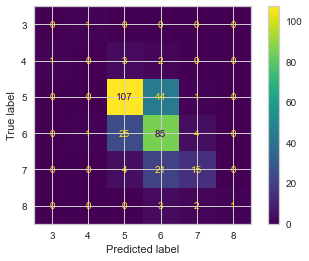

In [31]:
plot_confusion_matrix(svc,X_test,y_test)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.77      0.70      0.74       152
           6       0.55      0.74      0.63       115
           7       0.68      0.38      0.48        40
           8       1.00      0.17      0.29         6

    accuracy                           0.65       320
   macro avg       0.50      0.33      0.36       320
weighted avg       0.67      0.65      0.64       320



## Decision tree

In [43]:
X = df.drop('quality',axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)
multiclass_dt = DecisionTreeClassifier(random_state=3)
multiclass_dt.fit(X_train,y_train)
pred1 = multiclass_dt.predict(X_test)
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.29      0.17      0.21        12
           5       0.73      0.77      0.75       138
           6       0.70      0.65      0.67       131
           7       0.56      0.64      0.60        36
           8       0.00      0.00      0.00         1

    accuracy                           0.68       320
   macro avg       0.38      0.37      0.37       320
weighted avg       0.67      0.68      0.67       320



In [40]:
param_dist = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

cv_dt = GridSearchCV(multiclass_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_dt.fit(X_train, y_train)

print('Best Parameters using grid search: \n', cv_dt.best_params_)   #to get best Hyperparameters

Best Parameters using grid search: 
 {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'}


In [42]:
multiclass_dt = DecisionTreeClassifier(max_depth=5,max_features='auto',ccp_alpha=0.001,random_state=3)
multiclass_dt.fit(X_train,y_train)
pred1 = multiclass_dt.predict(X_test)
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.62      0.78      0.69       138
           6       0.58      0.58      0.58       131
           7       0.62      0.28      0.38        36
           8       0.00      0.00      0.00         1

    accuracy                           0.61       320
   macro avg       0.31      0.27      0.28       320
weighted avg       0.58      0.61      0.58       320



In [49]:
## Accuracy is better with default parameters rather than GridSearchCV in decision Tree as well

## Conclusion for multiclass

Best accuracy we got around 74% from Random Forest only for Multiclass scenario.

In [54]:
from scipy.stats import zscore

In [57]:
df_new = df[(np.abs(zscore(df)) < 3).all(axis=1)]

In [58]:
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [61]:
X = df_new.drop('quality',axis=1)
y = df_new['quality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)
multiclass_rf = RandomForestClassifier(random_state=3)
multiclass_rf.fit(X_train,y_train)
pred1 = multiclass_rf.predict(X_test)
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.75      0.84      0.79       197
           6       0.66      0.69      0.67       166
           7       0.67      0.53      0.59        55
           8       0.00      0.00      0.00         4

    accuracy                           0.71       436
   macro avg       0.42      0.41      0.41       436
weighted avg       0.67      0.71      0.69       436



## Final Conclusion

Binary classfication is a better approach to test the quality which gives better accuracy than multiclass classification . But in both cases Random Forest is giving best accuracy.